### Exploratory Data Analysis - Bank Loan Defaulters

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
#reading application.csv from the drive link provided

inp1=pd.read_csv(r"C:\Users\HP\Downloads\application_data.csv")

In [76]:
#checking if dataframe
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#checking shape of application_data
inp1.shape

(307511, 122)

Removing the unwanted columns first

In [78]:
remove=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp1.drop(labels=remove,axis=1,inplace=True)

In [79]:
inp1.shape

(307511, 92)

In [80]:
#checking for null/missing values in inp1 dataframe
pd.options.display.max_rows = 4000

a=inp1.isnull().sum()
a

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGIO

We can see that massive number of records are missing for columns that we will not be using for analysing. We can directly drop these columns where missing count > 92K which is approximately 30%

In [81]:
 307511*0.3

92253.3

In [82]:
# creating list of columns where missing records > 92K
empty=list(a[a>92000].index)
print(empty)

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', '

In [83]:
#deleting/dropping these columns
inp1.drop(labels=empty,axis=1,inplace=True)

In [84]:
inp1.shape

(307511, 42)

In [85]:
#check for remaining nulls
inp1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
R

Dropping some more unwanted columns

In [86]:
inp1.drop(inp1.loc[:,"EXT_SOURCE_2":"AMT_REQ_CREDIT_BUREAU_YEAR"],axis=1,inplace=True)

In [87]:
inp1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY      

SINCE TOTAL NUMBER OF RECORDS IS 30LACS+ therefore missing values for AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE is very less, so we will drop those as well.

In [88]:
inp1=inp1[~inp1.AMT_ANNUITY.isnull()]

In [89]:
inp1=inp1[~inp1.AMT_GOODS_PRICE.isnull()]

In [92]:
#copying data from inp1 to inp2
inp2=inp1[~inp1.NAME_TYPE_SUITE.isnull()]

In [93]:
inp2.shape

(306207, 30)

Checking nulls again

In [94]:
inp2.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int

Checking for correct data types for columns

In [96]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306207 non-null  int64  
 1   TARGET                       306207 non-null  int64  
 2   NAME_CONTRACT_TYPE           306207 non-null  object 
 3   CODE_GENDER                  306207 non-null  object 
 4   FLAG_OWN_CAR                 306207 non-null  object 
 5   FLAG_OWN_REALTY              306207 non-null  object 
 6   CNT_CHILDREN                 306207 non-null  int64  
 7   AMT_INCOME_TOTAL             306207 non-null  float64
 8   AMT_CREDIT                   306207 non-null  float64
 9   AMT_ANNUITY                  306207 non-null  float64
 10  AMT_GOODS_PRICE              306207 non-null  float64
 11  NAME_TYPE_SUITE              306207 non-null  object 
 12  NAME_INCOME_TYPE             306207 non-null  object 
 13 

Check for unique values

In [97]:
inp2.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [98]:
inp2.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Police', 'Business Entity Type 1',
       'Postal', 'Transport: type 3', 'Industry: type 4', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Industry: type 7',
       'Trade: type 3', 'Industry: type 3', 'Bank', 'Industry: type 9',
       'Insurance', 'Trade: type 6', 'Industry: type 2',
       'Transport: type 1', 'Industry: type 12', 'Mobile',
       'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [99]:
inp2.TARGET.unique()

array([1, 0], dtype=int64)

In [100]:
inp2.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [101]:
inp2.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [102]:
inp2.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

##### We can see that organisation type and gender code consists of XNA, Let's impute these values

In [103]:
inp2.CODE_GENDER.value_counts()

F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64

we have only 4 XNAs, we shall inpute these as F

In [104]:
inp2.loc[inp2["CODE_GENDER"]=='XNA',"CODE_GENDER"]='F'
inp2.CODE_GENDER.value_counts()

F    201639
M    104568
Name: CODE_GENDER, dtype: int64

In [107]:
inp2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67683
XNA                       55178
Self-employed             38256
Other                     16621
Medicine                  11144
Business Entity Type 2    10509
Government                10356
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5962
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3228
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7           1301
Transpor

In [106]:
inp2[inp2.ORGANIZATION_TYPE=='XNA'].shape

(55178, 30)

Since we have 55178 as XNA we cannot impute a value here as it can hamper our analysis. So better to drop these rows

In [108]:
inp2=inp2.drop(inp2.loc[inp2['ORGANIZATION_TYPE']=='XNA'].index)
inp2[inp2.ORGANIZATION_TYPE=='XNA'].shape

(0, 30)

In [112]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251029 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251029 non-null  int64  
 1   TARGET                       251029 non-null  int64  
 2   NAME_CONTRACT_TYPE           251029 non-null  object 
 3   CODE_GENDER                  251029 non-null  object 
 4   FLAG_OWN_CAR                 251029 non-null  object 
 5   FLAG_OWN_REALTY              251029 non-null  object 
 6   CNT_CHILDREN                 251029 non-null  int64  
 7   AMT_INCOME_TOTAL             251029 non-null  float64
 8   AMT_CREDIT                   251029 non-null  float64
 9   AMT_ANNUITY                  251029 non-null  float64
 10  AMT_GOODS_PRICE              251029 non-null  float64
 11  NAME_TYPE_SUITE              251029 non-null  object 
 12  NAME_INCOME_TYPE             251029 non-null  object 
 13 

In [ ]:
#REMOVING COLUMNS THAT ARE NOT USEFULL
inp2.drop(inp2.loc[:,"REGION_POPULATION_RELATIVE":"LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

#### BIVARIATE ANALYSIS

In [343]:
inp2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE'],
      dtype='object')

1. AMT_CREDIT VS TARGET

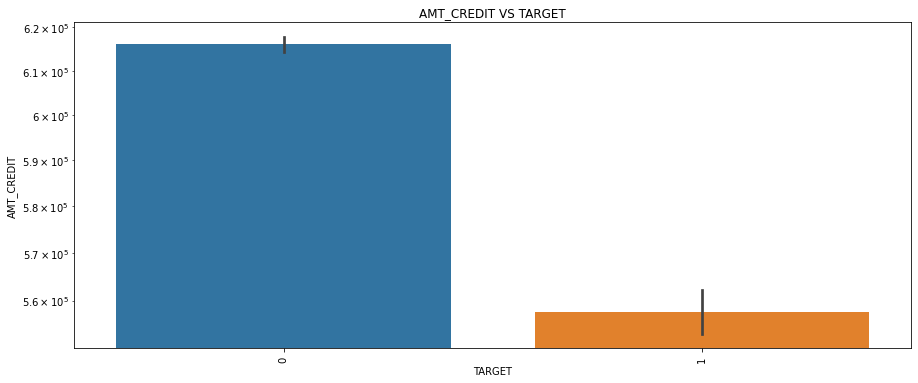

In [377]:
plt.figure(figsize = (15, 6))

sns.barplot(data=inp2,x="TARGET",y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("AMT_CREDIT VS TARGET")
plt.show()

2. INCOME VS TARGET

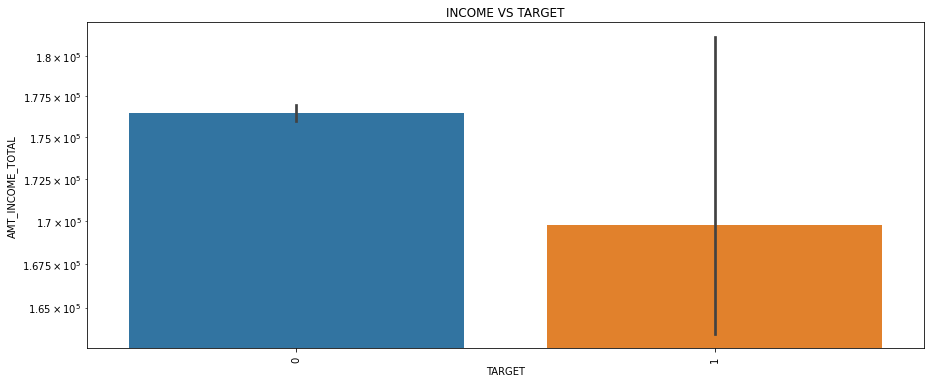

In [344]:
plt.figure(figsize = (15, 6))

sns.barplot(data=inp2,x="TARGET",y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("INCOME VS TARGET")
plt.show()

3. BOXPLOT INCOME

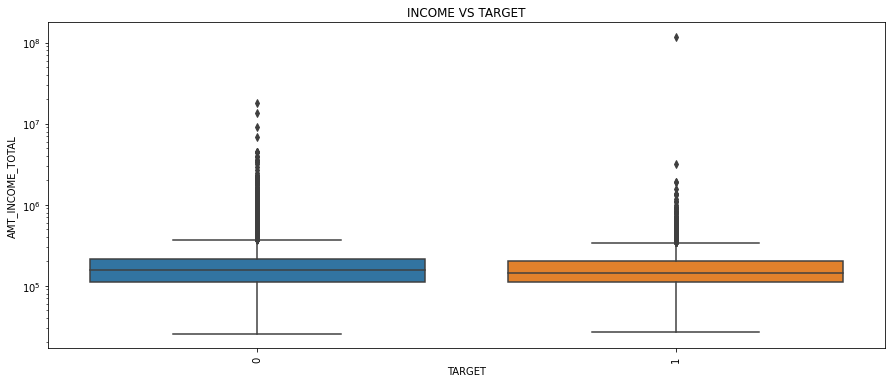

In [347]:
plt.figure(figsize = (15, 6))

sns.boxplot(data=inp2,x="TARGET",y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("INCOME VS TARGET")
plt.show()

We can see that there are outliers in the income, but we cannot remove them because these are important values. So instead of analysing income like this, we can put the income in buckets

4. INCOME VS INCOME TYPE

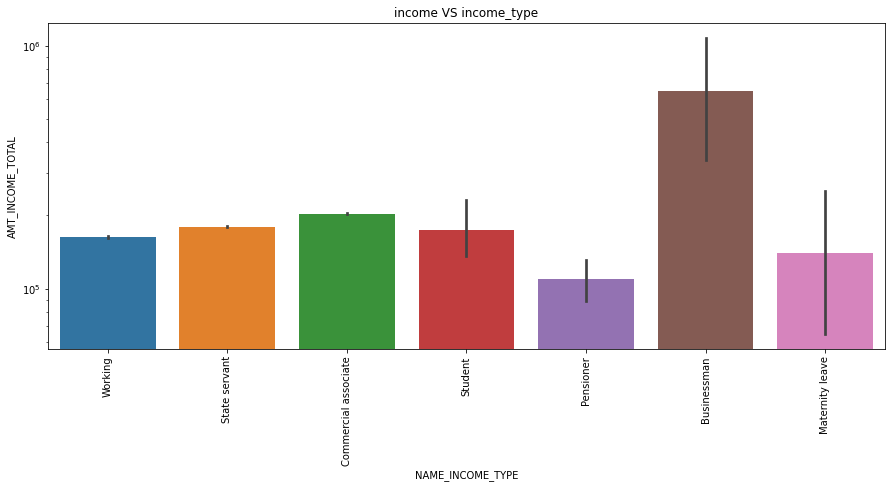

In [361]:
plt.figure(figsize = (15, 6))

sns.barplot(data=inp2,x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("income VS income_type")
plt.show()

5. GENDER VS INCOME

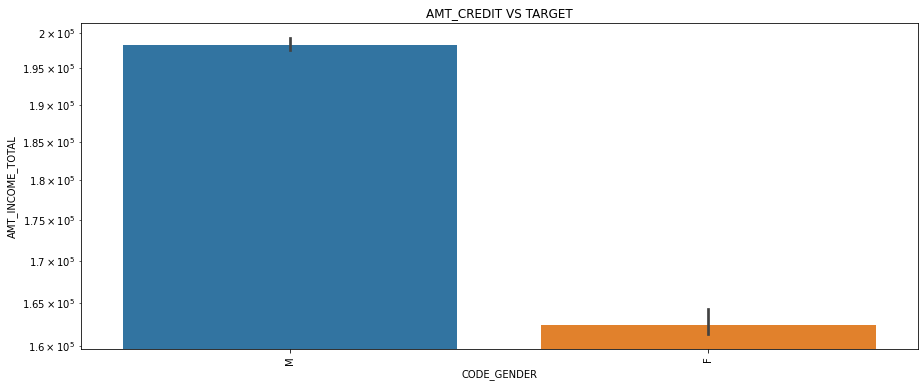

In [379]:
plt.figure(figsize = (15, 6))

sns.barplot(data=inp2,x="CODE_GENDER",y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("AMT_CREDIT VS TARGET")
plt.show()

#### Since AMT_INCOME_TOTAL,AMT_CREDIT are continous data, we will have to segregate them into bins for ploting graphs

1. Binning AMT_INCOME_TOTAL

In [118]:
inp2.AMT_INCOME_TOTAL.describe().apply(lambda x : format(x,'f'))

count       251029.000000
mean        175898.461228
std         259315.876639
min          25650.000000
25%         112500.000000
50%         157500.000000
75%         211500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [216]:
#creating bins and naming the bins. Creating a new column AMT_INCOME_RANGE which will consist the range of the income
bins = [0,100000,200000,300000,400000,500000,10000000000]
names = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
inp2["AMT_INCOME_RANGE"]=pd.cut(inp2.AMT_INCOME_TOTAL,bins=bins,labels=names)

In [219]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,School,200000-300000,500000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,100000-200000,500000 and above


2. Binning column AMT_CREDIT

In [198]:
inp2.AMT_CREDIT.describe().apply(lambda x: format(x,'f'))

count     251009.000000
mean      611018.469593
std       405850.533281
min        45000.000000
25%       277969.500000
50%       521280.000000
75%       828000.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

In [199]:
inp2[inp2.AMT_CREDIT>2000000].shape

(1751, 19)

In [200]:
np.arange(0,4500000,50000)

array([      0,   50000,  100000,  150000,  200000,  250000,  300000,
        350000,  400000,  450000,  500000,  550000,  600000,  650000,
        700000,  750000,  800000,  850000,  900000,  950000, 1000000,
       1050000, 1100000, 1150000, 1200000, 1250000, 1300000, 1350000,
       1400000, 1450000, 1500000, 1550000, 1600000, 1650000, 1700000,
       1750000, 1800000, 1850000, 1900000, 1950000, 2000000, 2050000,
       2100000, 2150000, 2200000, 2250000, 2300000, 2350000, 2400000,
       2450000, 2500000, 2550000, 2600000, 2650000, 2700000, 2750000,
       2800000, 2850000, 2900000, 2950000, 3000000, 3050000, 3100000,
       3150000, 3200000, 3250000, 3300000, 3350000, 3400000, 3450000,
       3500000, 3550000, 3600000, 3650000, 3700000, 3750000, 3800000,
       3850000, 3900000, 3950000, 4000000, 4050000, 4100000, 4150000,
       4200000, 4250000, 4300000, 4350000, 4400000, 4450000])

In [217]:
#creating bins and naming the bins. Creating a new column AMT_CREDIT_RANGE which will consist the range of the CREDIT
bins = [0,100000,200000,300000,400000,500000,10000000000]
names = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
inp2["AMT_CREDIT_RANGE"]=pd.cut(inp2.AMT_CREDIT,bins=bins,labels=names)

In [218]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,School,200000-300000,500000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,100000-200000,500000 and above


In [162]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251029 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   SK_ID_CURR           251029 non-null  int64   
 1   TARGET               251029 non-null  int64   
 2   NAME_CONTRACT_TYPE   251029 non-null  object  
 3   CODE_GENDER          251029 non-null  object  
 4   FLAG_OWN_CAR         251029 non-null  object  
 5   FLAG_OWN_REALTY      251029 non-null  object  
 6   CNT_CHILDREN         251029 non-null  int64   
 7   AMT_INCOME_TOTAL     251029 non-null  float64 
 8   AMT_CREDIT           251029 non-null  float64 
 9   AMT_ANNUITY          251029 non-null  float64 
 10  AMT_GOODS_PRICE      251029 non-null  float64 
 11  NAME_TYPE_SUITE      251029 non-null  object  
 12  NAME_INCOME_TYPE     251029 non-null  object  
 13  NAME_EDUCATION_TYPE  251029 non-null  object  
 14  NAME_FAMILY_STATUS   251029 non-null  object  
 15  

CHILDREN COUNT

In [167]:
inp2.CNT_CHILDREN.max()

19

The children more than 6 is absurd, so lets limit the data.

In [171]:
inp2=inp2[inp2.CNT_CHILDREN<=6]

In [176]:
inp2.CNT_CHILDREN.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [205]:
inp2.AMT_INCOME_RANGE.unique()

['200000-225000', '250000-275000', '50000-75000', '125000-150000', '100000-125000', ..., '325000-350000', '375000-400000', '400000-425000', '450000-475000', '475000-500000']
Length: 20
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000-100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

##### Dividing the dataset into two

- target = 1 (difficulty in payment)
- target = 0 (others)

In [220]:
target1=inp2.loc[inp2["TARGET"]==1]
target0 = inp2.loc[inp2["TARGET"]==0]

In [208]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Business Entity Type 3,100000-125000,900000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 3,200000-225000,1000000-2000000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Self-employed,125000-150000,250000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,Industry: type 4,300000-325000,900000-1000000


In [221]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,School,200000-300000,500000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,100000-200000,500000 and above
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Other,<100000,400000-500000


#### UNIVARIATE CATEGORICAL ANALYSIS

In [222]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,School,200000-300000,500000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,100000-200000,500000 and above


##### UNIVARIATE ANALYSIS

##### 1. TARGET VS INCOME RANGE

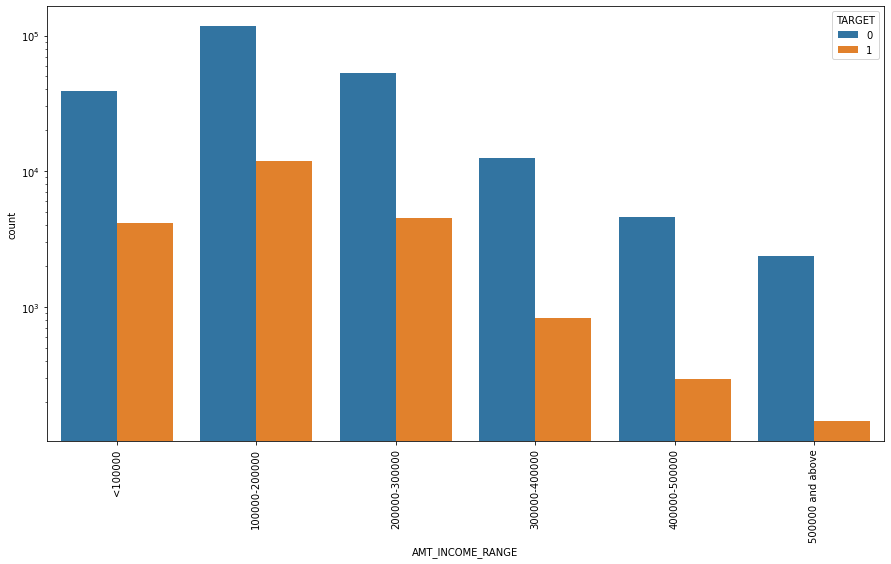

In [223]:
plt.figure(figsize = (15, 8))

sns.countplot(data=inp2,x="AMT_INCOME_RANGE",hue="TARGET")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

OUTCOME FROM ABOVE GRAPH

 --PEOPLE WITH INCOME RANGE (<100k,100k-200k,200k-300k) have high defaulters

##### TARGET VS GENDER

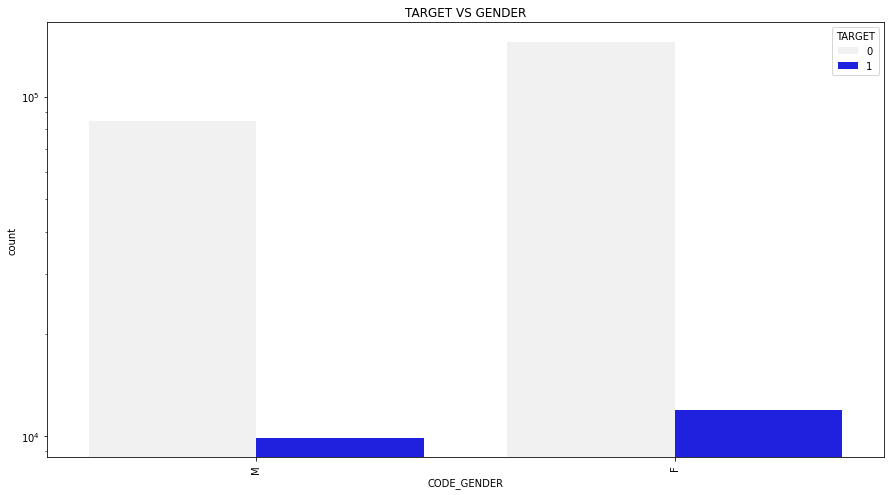

In [283]:
plt.figure(figsize = (15, 8))

sns.countplot(data=inp2,x="CODE_GENDER",hue="TARGET",color="blue")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS GENDER")
plt.show()

OUTCOME :

    FEMALES ARE FACING MORE DIFFICULTIES IN PAYING THE LOAN

In [235]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-300000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,School,200000-300000,500000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,<100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,100000-200000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,100000-200000,500000 and above


#### TARGET VS NAME FAMILY STATUS

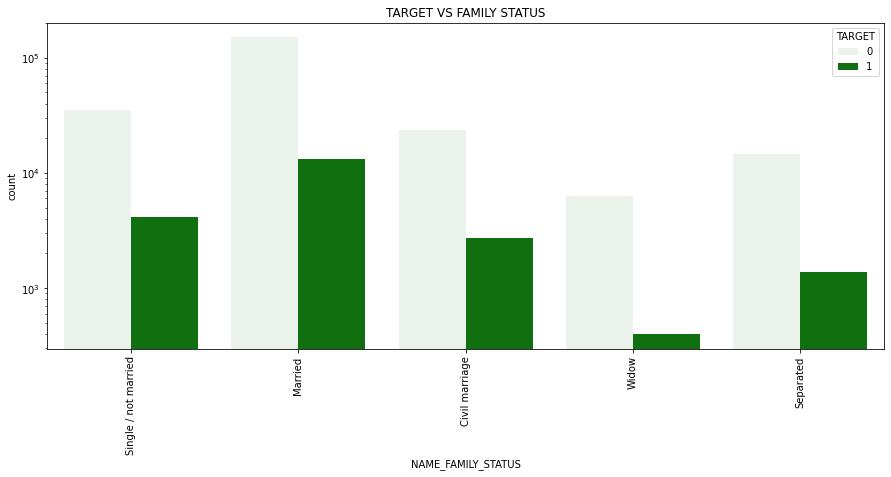

In [285]:
plt.figure(figsize = (15, 6))

sns.countplot(data=inp2,x="NAME_FAMILY_STATUS",hue="TARGET",color="g")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS FAMILY STATUS")
plt.show()

OUTCOME : 
    
    MARRIED PEOPLE HAVE DIFFICULTIES IN PAYING LOAN

#### TARGET VS INCOME TYPE

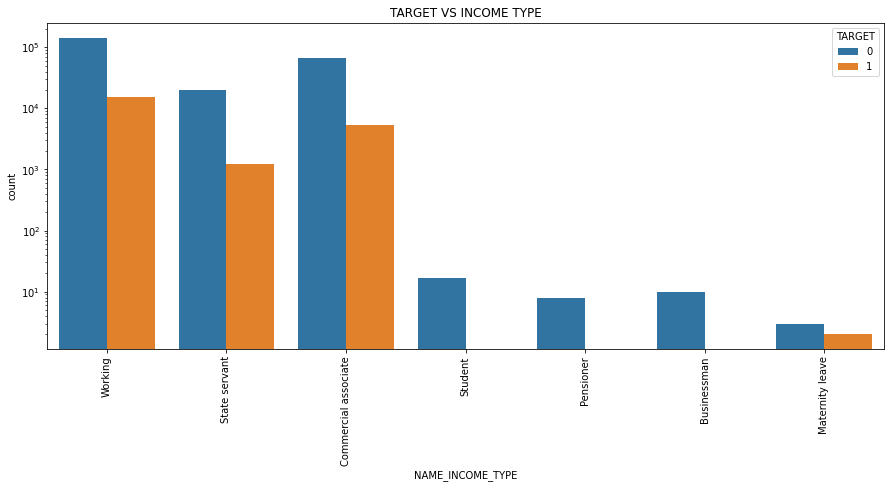

In [287]:
plt.figure(figsize = (15, 6))

sns.countplot(data=inp2,x="NAME_INCOME_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS INCOME TYPE")
plt.show()

OUTCOME:
    Students, pensioners, businessman - do not have any pending loans

#### TARGET VS NAME CONTRACT TYPE

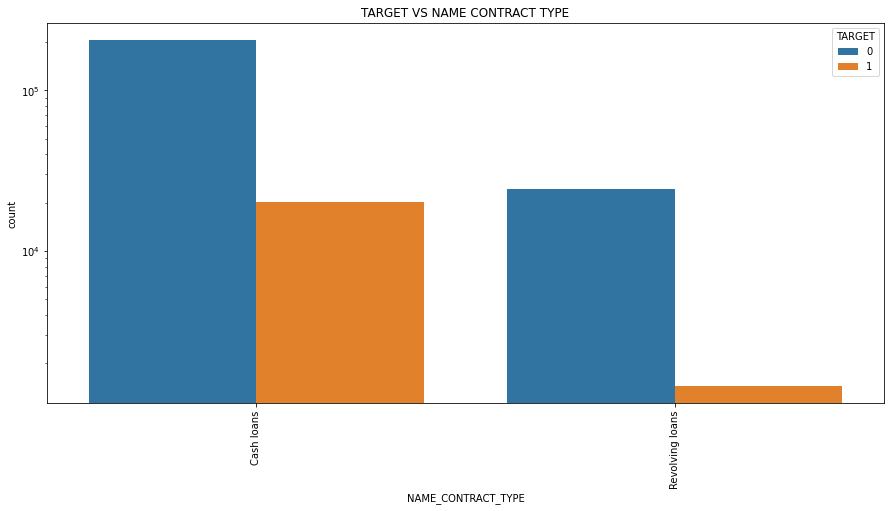

In [291]:
plt.figure(figsize = (15, 7))

sns.countplot(data=inp2,x="NAME_CONTRACT_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS NAME CONTRACT TYPE")
plt.show()

###### OUTCOME :
    Cash loans have difficulty in paying

TARGET AND HOUSING TYPE

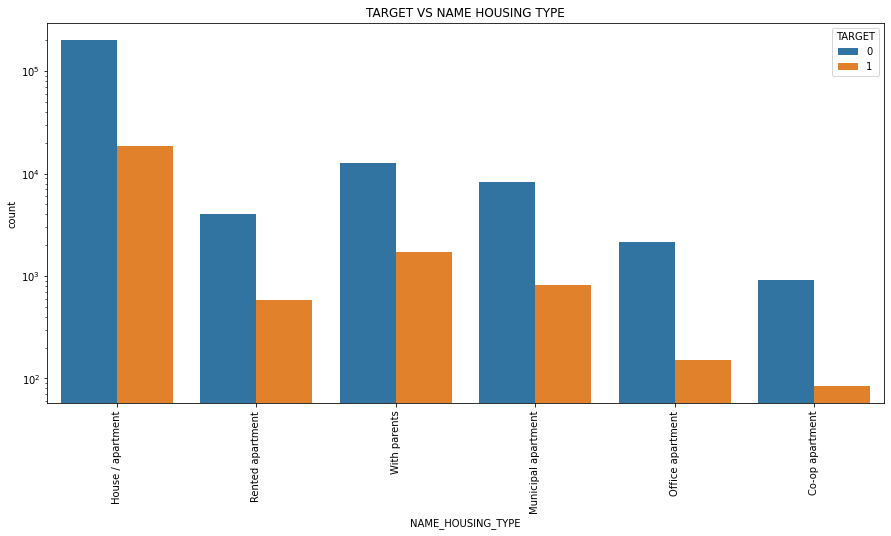

In [368]:
plt.figure(figsize = (15, 7))

sns.countplot(data=inp2,x="NAME_HOUSING_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS NAME HOUSING TYPE")
plt.show()

OUTCOME:
    People living in OFFICE APARTMENT, CO-OP APARTMENT face less difficulty in paying loans.
    

#### ANALYSING ONLY FOR TARGET1 - DIFFICULTY IN PAYING

In [265]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,200000-300000,400000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Business Entity Type 3,100000-200000,500000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 3,200000-300000,500000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Self-employed,100000-200000,200000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,Industry: type 4,300000-400000,500000 and above


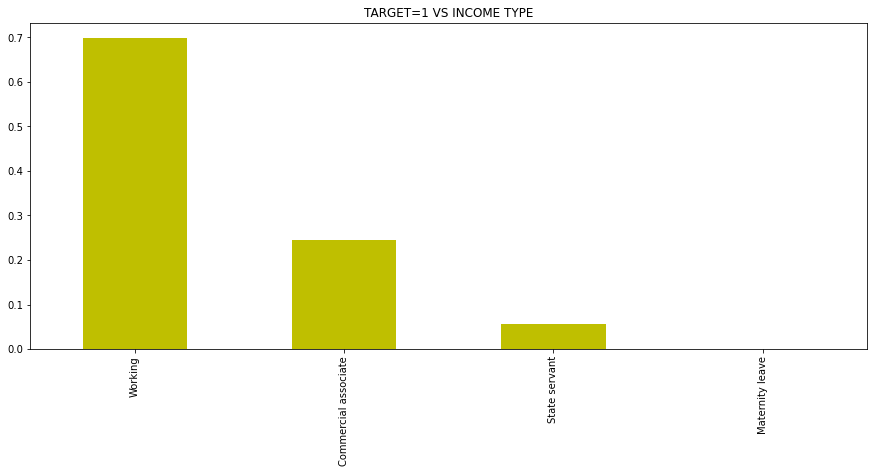

In [298]:
plt.figure(figsize = (15, 6))

target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color="y")
plt.title("TARGET=1 VS INCOME TYPE")
plt.show()

TARGET VS INCOME TYPE VS FAMILY STATUS

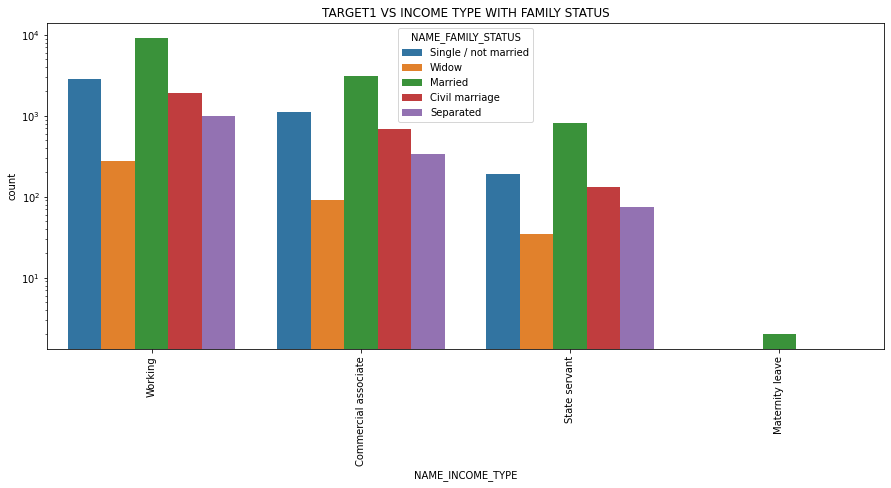

In [299]:
plt.figure(figsize = (15, 6))

sns.countplot(data=target1,x="NAME_INCOME_TYPE",hue="NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET1 VS INCOME TYPE WITH FAMILY STATUS")
plt.show()

###### OUTCOME:
    -Working professionals that are  married and on maternity leave face the most difficulty in paying the loans
    -least difficulty faced by people who are widow or separated
    - Working people who are married are facing the most difficulty

TARGET=1 NAME HOUSING TYPE WITH FAMILY STATUS

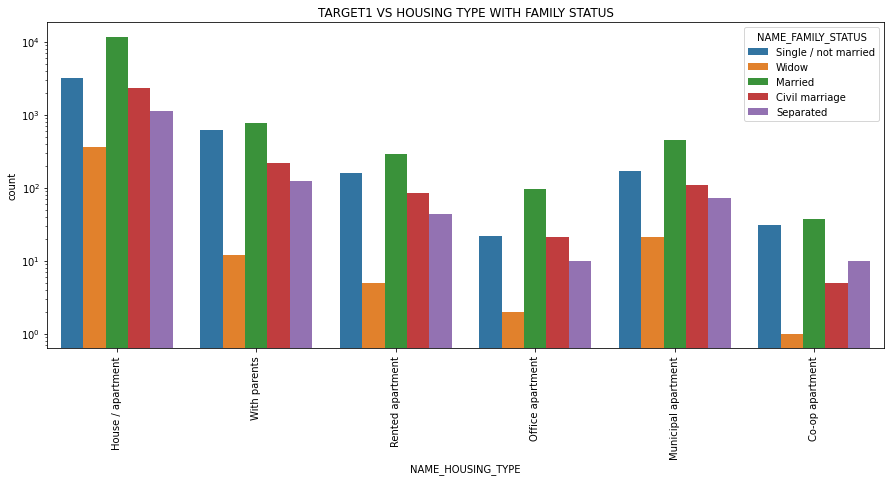

In [371]:
plt.figure(figsize = (15, 6))

sns.countplot(data=target1,x="NAME_HOUSING_TYPE",hue="NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET1 VS HOUSING WITH FAMILY STATUS")
plt.show()

TARGET=1 NAME HOUSING TYPE WITH INCOME TYPE

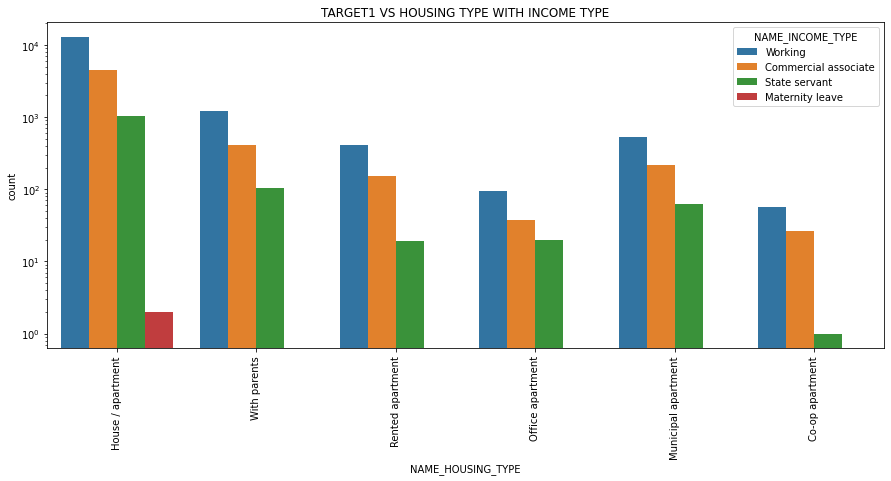

In [372]:
plt.figure(figsize = (15, 6))

sns.countplot(data=target1,x="NAME_HOUSING_TYPE",hue="NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET1 VS HOUSING TYPE WITH INCOME TYPE")
plt.show()

##### OUTCOME:
    -WORKING PEOPLE WHO ARE MARRIED AND LIVING IN APARTMENT FACE MORE DIFFICULTY IN PAYING LOANS.
    -PEOPLE WITH MATERNITY LEAVE SHOULD BE AVOIDED IN GRANTING LOANS


### READING PREVIOUS_APPLICATION DATA IN DATAFRAME

In [302]:
prev=pd.read_csv(r"C:\Users\HP\Downloads\previous_application.csv")
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


DROPPING UNNECESSARY COLUMNS

In [306]:
prev.drop(prev.loc[:,"WEEKDAY_APPR_PROCESS_START":"RATE_INTEREST_PRIVILEGED"],axis=1,inplace=True)

In [307]:
prev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_DOWN_PAYMENT           774370 non-null   float64
 7   AMT_GOODS_PRICE            1284699 non-null  float64
 8   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 9   NAME_CONTRACT_STATUS       1670214 non-null  object 
 10  DAYS_DECISION              1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE          1670214 non-null  object 
 12  CODE_REJECT_REASON         1670214 non-null  object 
 13  NAME_TYPE_SU

In [308]:
prev.drop(prev.loc[:,"NAME_YIELD_GROUP":"NFLAG_INSURED_ON_APPROVAL"],axis=1,inplace=True)


In [310]:
prev.drop(prev.loc[:,"CODE_REJECT_REASON":"NAME_CLIENT_TYPE"],axis=1,inplace=True)


In [312]:
prev.drop(prev.loc[:,"CHANNEL_TYPE":"CNT_PAYMENT"],axis=1,inplace=True)


DROPPING ROWS WHERE NAME_CASH_LOAN_PURPOSE IS XNA OR XAP

In [319]:
prev=prev[~(prev.NAME_CASH_LOAN_PURPOSE=="XNA")]

In [320]:
prev=prev[~(prev.NAME_CASH_LOAN_PURPOSE=="XAP")]

In [321]:
prev.NAME_CASH_LOAN_PURPOSE.unique()

array(['Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [322]:
prev.NAME_CONTRACT_STATUS.unique()

array(['Refused', 'Approved', 'Canceled', 'Unused offer'], dtype=object)

#### Joining application and previous_application 

In [323]:
new=pd.merge(left=inp2,right=prev,how='outer',on='SK_ID_CURR',suffixes='_x')
new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPEx', 'AMT_ANNUITYx',
       'AMT_APPLICATION', 'AMT_CREDITx', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICEx', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE'],
      dtype='object')

1. ANALYSING FOR WHICH PURPOSE TARGET VS LOAN PURPOSE

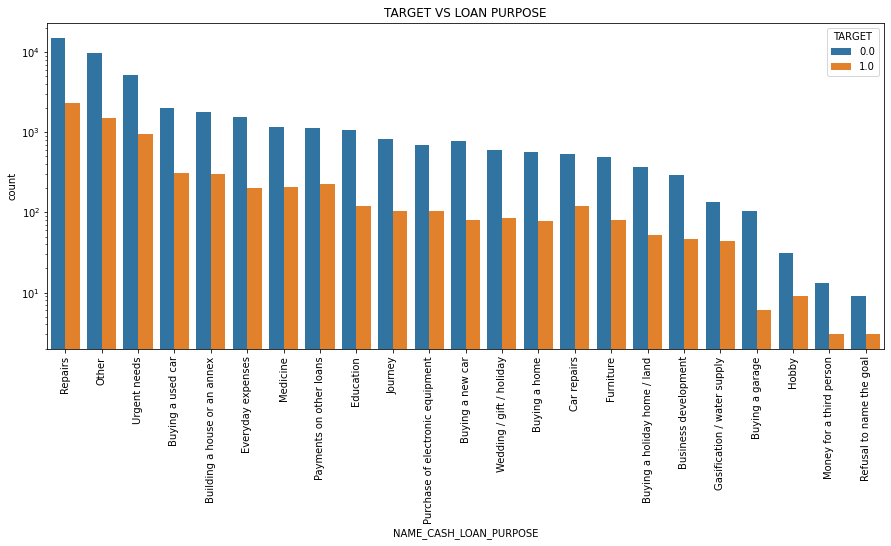

In [326]:
plt.figure(figsize = (15, 6))

sns.countplot(data=new,x="NAME_CASH_LOAN_PURPOSE",hue="TARGET",order=new['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("TARGET VS LOAN PURPOSE")
plt.show()

##### OUTCOME:
    REPAIRS ARE FACING DIFFICULTY IN REPAYING LOAN

    

2. LOAN REJECTION VS PURPOSE

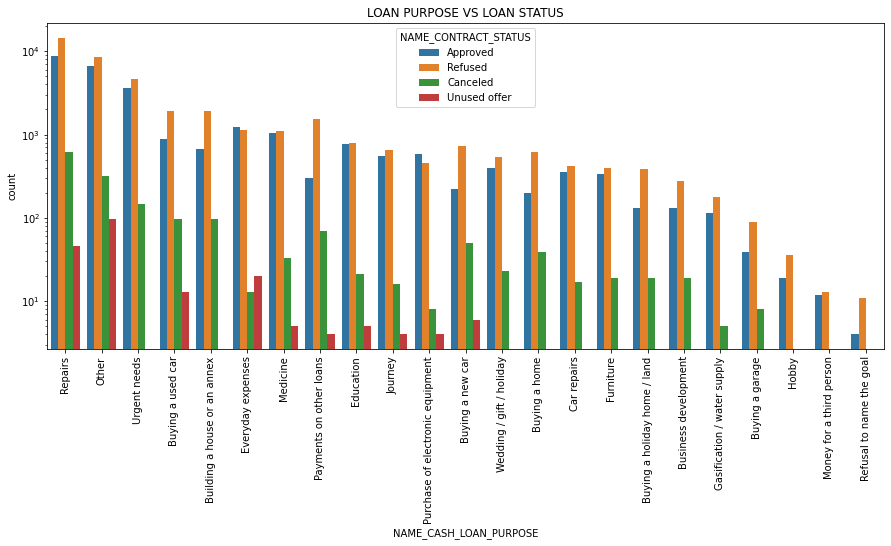

In [334]:
plt.figure(figsize = (15, 6))

sns.countplot(data=new,x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS",order=new['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("LOAN PURPOSE VS LOAN STATUS")
plt.show()

###### OUTCOME:
    HIGHEST APPROVALS IN REPAIRS, OTHERS AND URGENT NEEDS. FOR THE SAME FIELDS WE HAVE THE HIGHEST NUMBER OF DEFAULTERS

## FINAL CONCLUSIONS:
    -Bank should focus on acquiring more clients which are students, pensioners, widows or businessmen, with housing type “CO-OP Apartment” as there are very less no defaulters or late payments from them.

    -Bank should restrict loan amount for people earning less than 300k ( specially females, as the no. of female defaulters is high)

    -Bank should focus less on “Working” type people who are living in house/apartment as they have the highest number of defaulters.

    -Bank should approve less loans for “repair” , “urgent”, “others” purposes as these are having highest defaulters. 

    -People on “maternity” should not be granted loans.(Especially females)